# TRADITIONAL ML CLASSIFICATION ALGORITHMS FOR KEYLOGGERS DETECTION.


#### AIM: TO TEST PROMINENT ML CLASSIFICATION ALGORITHMS AND OBSERVE IF THEY CAN PREDICT THE PRESENCE OF KEYLOGGERS IN A SYSTEM WITH HIGH CONFIDENCE.

#### IMPORT REQUIRED LIBRARIES

In [ ]:
# Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns

from sklearn.metrics import roc_auc_score,accuracy_score,roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics

#### Reading Data

In [ ]:
data1 = pd.read_csv('Keylogger_Detection.csv')
data1.head(5)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,S/N,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,0,10.42.0.211-52.6.25.230-34451-443-6,10.42.0.211,34451,52.6.25.230,443,6.0,04/08/2017 05:12,12140931,9,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,172.217.3.99-10.42.0.151-443-53892-6,10.42.0.151,53892,172.217.3.99,443,6.0,04/08/2017 07:55,418882,102,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2,172.217.3.98-10.42.0.151-443-50750-6,172.217.3.98,443,10.42.0.151,50750,6.0,04/08/2017 08:48,45,2,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3,10.42.0.211-10.42.0.1-23025-53-17,10.42.0.211,23025,10.42.0.1,53,17.0,04/08/2017 05:54,541699,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,4,10.42.0.211-123.129.244.226-52602-443-6,10.42.0.211,52602,123.129.244.226,443,6.0,04/08/2017 08:44,7310795,3,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


#### Understanding Data

In [ ]:
data1.dtypes

S/N                  int64
Flow ID             object
 Source IP          object
 Source Port         int64
 Destination IP     object
                    ...   
Idle Mean          float64
 Idle Std          float64
 Idle Max          float64
 Idle Min          float64
Class               object
Length: 86, dtype: object

In [ ]:
data1.shape

(65139, 86)

In [ ]:
Class_df = data1["Class"]
data2 = data1.select_dtypes(include=[np.number])
data2 = data2.join(Class_df)

#### Data Preparation

In [ ]:
# Removing nan values

print(data2.isna().sum().sum())
data2 = data2.dropna()

182


In [ ]:
data2["Target"] = data2["Class"]
data2.loc[data2.Target == "Benign", 'Target'] = 0
data2.loc[data2.Target == "Keylogger", 'Target'] = 1

data2.drop('Class', axis = 1, inplace = True)

data2.sample(5)

<ipython-input-260-c7782ed213fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["Target"] = data2["Class"]
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,S/N,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Target
22021,22021,54583,443,6.0,30875738,23,24.0,917.0,23146.0,586,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
24272,24272,57430,443,6.0,1346,3,0.0,42.0,0.0,42,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8088,8088,41694,443,6.0,57673,2,1.0,713.0,416.0,713,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5026,5026,22328,53,17.0,97399,1,1.0,28.0,44.0,28,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
53592,53592,54527,443,6.0,37986,2,0.0,0.0,0.0,0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


#### Distribution Classes

In [ ]:
data2.groupby('Target').size()

Target
0    38286
1    26849
dtype: int64

#### Check Data Distribution

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


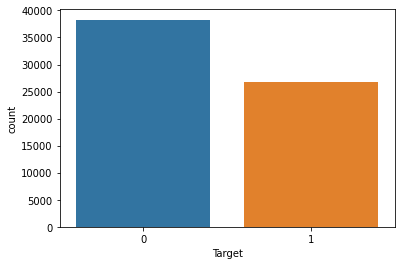

In [ ]:
sns.countplot(data2['Target'])

In [ ]:
# To Upsample Target

from sklearn.utils import resample

#create two dataframes for majority and minorit class
data_maj = data2[(data2['Target'] == 0)]
data_min = data2[(data2['Target'] == 1)]

#upsample minority class
data_up = resample(data_min, replace = True, n_samples = 308813, random_state = 42)

#combine upsampled class and majority class
data2 = pd.concat([data_up, data_maj])

#### Remove Useless Features

In [ ]:
for col in (data2.iloc[:, :-1].columns):
    if(data2[col].min() == data2[col].max()):
            data2.drop(col, axis = 1, inplace = True)

#### Feature Scaling

In [ ]:
# Standardization

def standardize(df, col):
    df[col] = (df[col] - df[col].mean()) / (df[col].std()) # Standardization

for i in (data2.iloc[:, :-1].columns):
    standardize(data2, i)

data2.head(5)

,S/N,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Target
57322,1.316155,-0.760059,-0.391198,1.972498,-0.501011,-0.097487,-0.058678,-0.015113,-0.047019,-0.458135,...,0.005368,-0.208108,-0.099326,-0.212761,-0.192819,-0.317285,-0.131447,-0.324014,-0.304123,1
38187,0.298853,-1.601817,-0.391198,1.972498,-0.489998,-0.097487,-0.058678,-0.015470,-0.047386,-0.522019,...,0.005366,-0.208108,-0.099326,-0.212761,-0.192819,-0.317285,-0.131447,-0.324014,-0.304123,1
2027,-1.623574,1.161584,-0.366008,-0.483749,-0.477743,-0.082306,-0.064869,-0.015932,-0.047589,-0.604536,...,0.005368,-0.208108,-0.099326,-0.212761,-0.192819,-0.317285,-0.131447,-0.324014,-0.304123,1
12986,-1.040945,-1.448486,-0.391198,1.972498,-0.492923,-0.097487,-0.058678,-0.015500,-0.047226,-0.527343,...,0.005368,-0.208108,-0.099326,-0.212761,-0.192819,-0.317285,-0.131447,-0.324014,-0.304123,1
52210,1.044378,0.626811,-0.366008,-0.483749,1.604285,0.023958,-0.027728,-0.010926,-0.034590,-0.045550,...,0.005368,-0.208108,-0.099326,-0.212761,-0.192819,-0.317285,-0.131447,-0.324014,-0.304123,1


#### Split DataSet.

In [ ]:
target = ['Target']
features = [c for c in data2.columns if c != "Target"]

In [ ]:
X = data2[features].values # Features
y = data2[target].values # Target

X = X.astype(np.float32)
y = y.astype(np.float32)

X.shape, y.shape,

((347099, 68), (347099, 1))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((277679, 68), (69420, 68), (277679, 1), (69420, 1))

#### Build Model

In [ ]:
# Logistic Regression Algorithm

print('___RUNNING LOGISTICS REGRESSION ALGORITHM_________\n')
lr = LogisticRegression(max_iter = 500, solver = 'liblinear')
score = cross_val_score(lr, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 3)
lr_mse = round(abs(score.mean()), 4)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_accuracy = round(metrics.accuracy_score(y_test, y_pred), 4)

# Random Forest Algorithm

print('___RUNNING RANDOM FOREST ALGORITHM_________\n')
rf = RandomForestClassifier(n_estimators = 100)
score = cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
rf_mse = round(abs(score.mean()), 4)
rf.fit(X_train, y_train)
y_pred = lr.predict(X_test)
rf_accuracy = round(metrics.accuracy_score(y_test, y_pred), 4)

# K-Nearest Neighbor Algorithm

print('___RUNNING KNN ALGORITHM_________\n')
knn = KNeighborsClassifier(n_neighbors = 3)
score = cross_val_score(knn, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
knn_mse = round(abs(score.mean()), 4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accuracy = round(metrics.accuracy_score(y_test, y_pred), 4)

# Gaussian Naive Bayes Algorithm

print('___RUNNING GNB ALGORITHM_________\n')
gnb = GaussianNB()
score = cross_val_score(gnb, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
gnb_mse = round(abs(score.mean()), 4)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
gnb_accuracy = round(metrics.accuracy_score(y_test, y_pred), 4)

# Decision Tree Algorithm

print('___RUNNING Decision Tree ALGORITHM_________\n')
dt = DecisionTreeClassifier()
score = cross_val_score(dt, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
dt_mse = round(abs(score.mean()), 4)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
dt_accuracy = round(metrics.accuracy_score(y_test, y_pred), 4)

# Extreme Gradient Boosting Algorithm

print('___RUNNING XGB ALGORITHM_________\n')
xgb = XGBClassifier()
score = cross_val_score(xgb, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
xgb_mse = round(abs(score.mean()), 4)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
xgb_accuracy = round(metrics.accuracy_score(y_test, y_pred), 4)

# Light Gradient Boosting M Algorithm

print('___RUNNING LGBM ALGORITHM_________\n')
lgbm = LGBMClassifier()
score = cross_val_score(lgbm, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
lgbm_mse = round(abs(score.mean()), 4)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
lgbm_accuracy = round(metrics.accuracy_score(y_test, y_pred), 4)


model_data = pd.DataFrame({
    'Model' : ['Logistics Regression', 'Random Forest', 'KNN', 'Gaussian Naive Bayes', 'Decision Tree', 'XGB Classifier', 'LGBM Classifier'],
    'Train Error' : [lr_mse, rf_mse, knn_mse, gnb_mse, dt_mse, xgb_mse, lgbm_mse],
    'Test Accuracy' : [lr_accuracy, rf_accuracy, knn_accuracy, gnb_accuracy, dt_accuracy, xgb_accuracy, lgbm_accuracy]
})

print(model_data.sort_values('Test Accuracy', ascending = False).reset_index(drop = True))

___RUNNING LOGISTICS REGRESSION ALGORITHM_________



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

___RUNNING RANDOM FOREST ALGORITHM_________



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

___RUNNING KNN ALGORITHM_________



/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

___RUNNING GNB ALGORITHM_________



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

___RUNNING Decision Tree ALGORITHM_________

___RUNNING XGB ALGORITHM_________



/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

___RUNNING LGBM ALGORITHM_________



/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

                  Model  Train Error  Test Accuracy
0         Decision Tree       0.0325         0.9735
1                   KNN       0.0716         0.9358
2       LGBM Classifier       0.1024         0.8980
3        XGB Classifier       0.1095         0.8910
4  Logistics Regression       0.1101         0.8903
5         Random Forest       0.0395         0.8903
6  Gaussian Naive Bayes       0.8793         0.1212


#### Evaluation

#### Decision Tree Algorithm

In [ ]:
y_pred = dt.predict(X_test)
AUC = metrics.roc_auc_score(y_test,y_pred)
print("AUC: {:.3f}".format(AUC))

AUC: 0.879


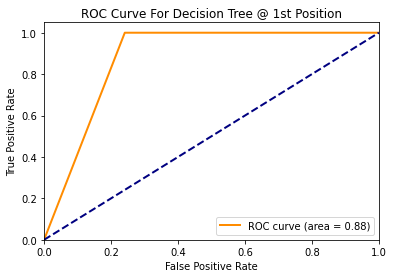

In [ ]:
def generate_results(y_test, y_score):
    # print(y_score)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    pt.figure()
    pt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    pt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    pt.xlim([0.0, 1.0])
    pt.ylim([0.0, 1.05])
    pt.xlabel('False Positive Rate')
    pt.ylabel('True Positive Rate')
    pt.title('ROC Curve For Decision Tree @ 1st Position')
    pt.legend(loc="lower right")
    pt.show()
    
generate_results(y_test, y_pred)

#### K-Nearest Neighbor Algorithm

In [ ]:
y_pred = knn.predict(X_test)
AUC = metrics.roc_auc_score(y_test,y_pred)
print("AUC: {:.3f}".format(AUC))

AUC: 0.709


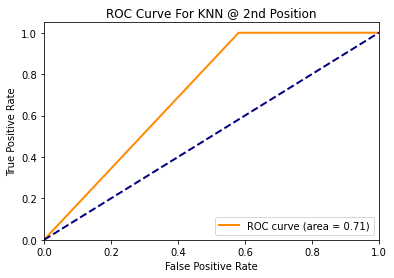

In [ ]:
def generate_results(y_test, y_score):
    # print(y_score)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    pt.figure()
    pt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    pt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    pt.xlim([0.0, 1.0])
    pt.ylim([0.0, 1.05])
    pt.xlabel('False Positive Rate')
    pt.ylabel('True Positive Rate')
    pt.title('ROC Curve For KNN @ 2nd Position')
    pt.legend(loc="lower right")
    pt.show()
    
generate_results(y_test, y_pred)

#### Light Gradient Boost Machine ALgorithm

In [ ]:
y_pred = lgbm.predict(X_test)
AUC = metrics.roc_auc_score(y_test,y_pred)
print("AUC: {:.3f}".format(AUC))

AUC: 0.537


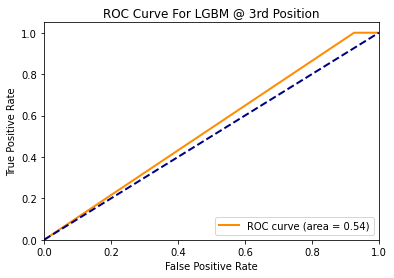

In [ ]:
def generate_results(y_test, y_score):
    # print(y_score)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    pt.figure()
    pt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    pt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    pt.xlim([0.0, 1.0])
    pt.ylim([0.0, 1.05])
    pt.xlabel('False Positive Rate')
    pt.ylabel('True Positive Rate')
    pt.title('ROC Curve For LGBM @ 3rd Position')
    pt.legend(loc="lower right")
    pt.show()
    
generate_results(y_test, y_pred)

#### Extreme Gradient Boost Algorithm

In [ ]:
y_pred = xgb.predict(X_test)
AUC = metrics.roc_auc_score(y_test,y_pred)
print("AUC: {:.3f}".format(AUC))

AUC: 0.504


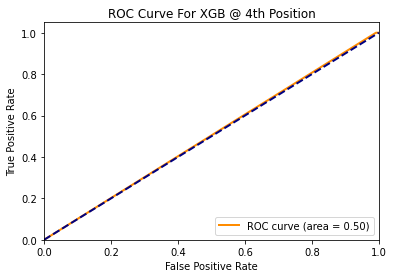

In [ ]:
def generate_results(y_test, y_score):
    # print(y_score)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    pt.figure()
    pt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    pt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    pt.xlim([0.0, 1.0])
    pt.ylim([0.0, 1.05])
    pt.xlabel('False Positive Rate')
    pt.ylabel('True Positive Rate')
    pt.title('ROC Curve For XGB @ 4th Position')
    pt.legend(loc="lower right")
    pt.show()
    
generate_results(y_test, y_pred)

#### Logistic Regression Algorithm

In [ ]:
y_pred = lr.predict(X_test)
AUC = metrics.roc_auc_score(y_test,y_pred)
print("AUC: {:.3f}".format(AUC))

AUC: 0.502


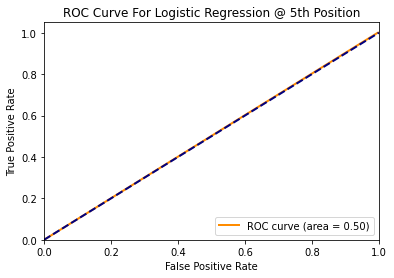

In [ ]:
def generate_results(y_test, y_score):
    # print(y_score)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    pt.figure()
    pt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    pt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    pt.xlim([0.0, 1.0])
    pt.ylim([0.0, 1.05])
    pt.xlabel('False Positive Rate')
    pt.ylabel('True Positive Rate')
    pt.title('ROC Curve For Logistic Regression @ 5th Position')
    pt.legend(loc="lower right")
    pt.show()
    
generate_results(y_test, y_pred)

#### Random Forest Algorithm

In [ ]:
y_pred = rf.predict(X_test)
AUC = metrics.roc_auc_score(y_test,y_pred)
print("AUC: {:.3f}".format(AUC))

AUC: 0.859


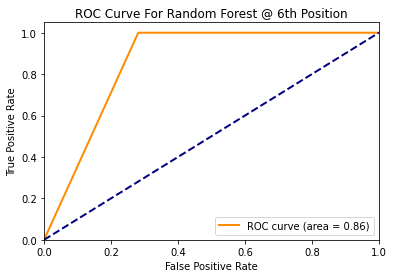

In [ ]:
def generate_results(y_test, y_score):
    # print(y_score)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    pt.figure()
    pt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    pt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    pt.xlim([0.0, 1.0])
    pt.ylim([0.0, 1.05])
    pt.xlabel('False Positive Rate')
    pt.ylabel('True Positive Rate')
    pt.title('ROC Curve For Random Forest @ 6th Position')
    pt.legend(loc="lower right")
    pt.show()
    
generate_results(y_test, y_pred)

#### Gaussian Naive Bayes Algorithm

In [ ]:
y_pred = gnb.predict(X_test)
AUC = metrics.roc_auc_score(y_test,y_pred)
print("AUC: {:.3f}".format(AUC))

AUC: 0.501


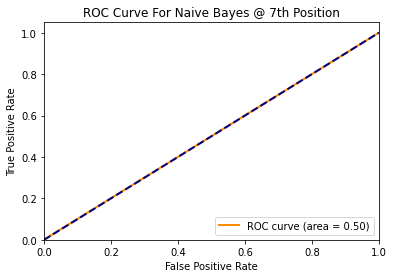

In [ ]:
def generate_results(y_test, y_score):
    # print(y_score)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    pt.figure()
    pt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    pt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    pt.xlim([0.0, 1.0])
    pt.ylim([0.0, 1.05])
    pt.xlabel('False Positive Rate')
    pt.ylabel('True Positive Rate')
    pt.title('ROC Curve For Naive Bayes @ 7th Position')
    pt.legend(loc="lower right")
    pt.show()
    
generate_results(y_test, y_pred)